In [10]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Dell\Desktop\Customer Travel.csv")

In [11]:
df.head

<bound method NDFrame.head of      Age Frequent Flyer Annual Income Class  Services Opted  \
0     34             No       Middle Income               6   
1     34            Yes          Low Income               5   
2     37             No       Middle Income               3   
3     30             No       Middle Income               2   
4     30             No          Low Income               1   
..   ...            ...                 ...             ...   
949   31            Yes          Low Income               1   
950   30             No       Middle Income               5   
951   37             No       Middle Income               4   
952   30             No          Low Income               1   
953   31            Yes         High Income               1   

    Account Synced To SocialMedia Booked Hotel Or Not  Target  
0                              No                 Yes       0  
1                             Yes                  No       1  
2                    

In [12]:
df.shape

(954, 7)

In [13]:
df.info

<bound method DataFrame.info of      Age Frequent Flyer Annual Income Class  Services Opted  \
0     34             No       Middle Income               6   
1     34            Yes          Low Income               5   
2     37             No       Middle Income               3   
3     30             No       Middle Income               2   
4     30             No          Low Income               1   
..   ...            ...                 ...             ...   
949   31            Yes          Low Income               1   
950   30             No       Middle Income               5   
951   37             No       Middle Income               4   
952   30             No          Low Income               1   
953   31            Yes         High Income               1   

    Account Synced To SocialMedia Booked Hotel Or Not  Target  
0                              No                 Yes       0  
1                             Yes                  No       1  
2                  

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
Services Opted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [16]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
print('count and percentage of missing values for the columns:')
missing_data

count and percentage of missing values for the columns:


,count,percentage
Age,0,0.0
Frequent Flyer,0,0.0
Annual Income Class,0,0.0
Services Opted,0,0.0
Account Synced To SocialMedia,0,0.0
Booked Hotel Or Not,0,0.0
Target,0,0.0


In [18]:
df.columns

Index(['Age', 'Frequent Flyer', 'Annual Income Class', 'Services Opted',
       'Account Synced To SocialMedia', 'Booked Hotel Or Not', 'Target'],
      dtype='object')

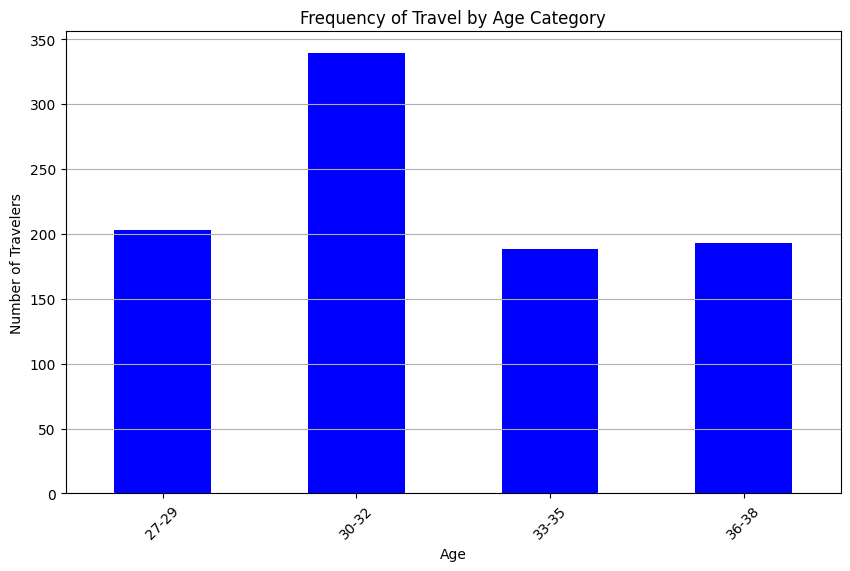

In [53]:
import matplotlib.pyplot as plt
bins = [27, 30, 33, 36, 38] 
labels = ['27-29', '30-32', '33-35', '36-38']
df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

tourism_counts = df['age_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
tourism_counts.plot(kind='bar', color='b')
plt.title('Frequency of Travel by Age Category')
plt.xlabel('Age')
plt.ylabel('Number of Travelers')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

    Age Frequent Flyer Annual Income Class  Services Opted  \
1    34            Yes          Low Income               5   
5    27            Yes         High Income               1   
9    36            Yes         High Income               1   
13   34            Yes          Low Income               4   
15   37            Yes          Low Income               6   

   Account Synced To SocialMedia Booked Hotel Or Not  Target age_category  
1                            Yes                  No       1        33-35  
5                             No                 Yes       1        27-29  
9                             No                  No       1        36-38  
13                            No                  No       0        33-35  
15                            No                 Yes       0        36-38  
Total travelers: 954
Total frequent flyers: 286
Proportion of frequent flyers: 29.98%
Age distribution among frequent flyers:
count    286.000000
mean      32.360140
std  

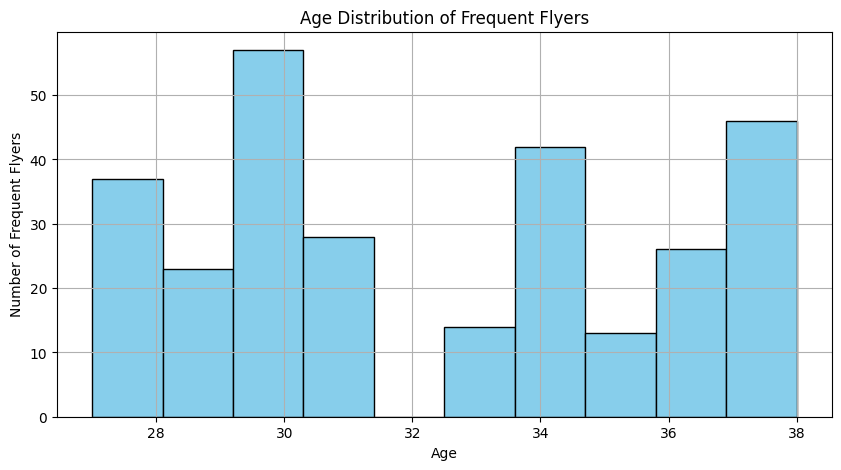

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [49]:
frequent_flyers = df[df['Frequent Flyer'] == 'Yes']

print(frequent_flyers.head())

total_travelers = len(df)
total_frequent_flyers = len(frequent_flyers)
proportion_frequent_flyers = total_frequent_flyers / total_travelers

print(f"Total travelers: {total_travelers}")
print(f"Total frequent flyers: {total_frequent_flyers}")
print(f"Proportion of frequent flyers: {proportion_frequent_flyers:.2%}")

age_distribution = frequent_flyers['Age'].describe()
income_distribution = frequent_flyers['Annual Income Class'].describe()

print("Age distribution among frequent flyers:")
print(age_distribution)
print("\nIncome distribution among frequent flyers:")
print(income_distribution)

plt.figure(figsize=(10, 5))
plt.hist(frequent_flyers['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Frequent Flyers')
plt.xlabel('Age')
plt.ylabel('Number of Frequent Flyers')
plt.grid(True)
plt.show()

unique_income_classes = sorted(frequent_flyers['Annual Income Class'].unique())
bins = [i - 0.5 for i in unique_income_classes] + [unique_income_classes[-1] + 0.5]

# Visualize annual income distribution with specified bins
plt.figure(figsize=(10, 5))
plt.hist(frequent_flyers['Annual Income Class'], bins=bins, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution of Frequent Flyers')
plt.xlabel('Annual Income')
plt.ylabel('Number of Frequent Flyers')
plt.xticks(unique_income_classes)  # Set x-ticks to the unique income classes
plt.grid(True)
plt.show()

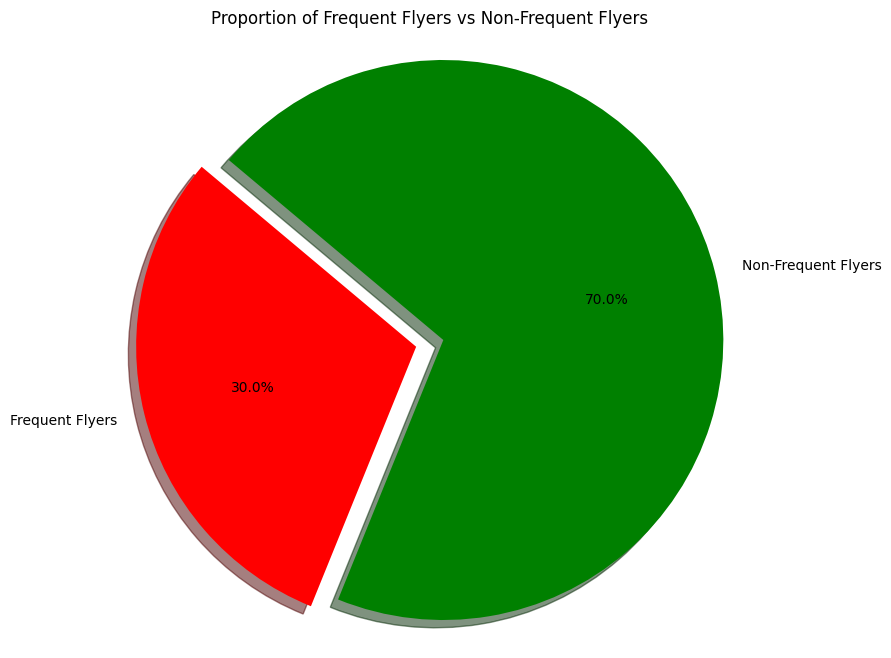

In [51]:
frequent_flyers = df[df['Frequent Flyer'] == 'Yes']

total_travelers = len(df)
total_frequent_flyers = len(frequent_flyers)
total_non_frequent_flyers = total_travelers - total_frequent_flyers

percentage_frequent_flyers = (total_frequent_flyers / total_travelers) * 100
percentage_non_frequent_flyers = (total_non_frequent_flyers / total_travelers) * 100

labels = ['Frequent Flyers', 'Non-Frequent Flyers']
sizes = [percentage_frequent_flyers, percentage_non_frequent_flyers]
colors = ['red', 'green']
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Frequent Flyers vs Non-Frequent Flyers')
plt.axis('equal')  
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7184\3572916915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_bookings['age_group'] = pd.cut(hotel_bookings['Age'], bins=bins, labels=labels, right=False)


Hotel Bookings by Age Group:
age_group
25-29     73
30-34    196
35-39    109
Name: count, dtype: int64


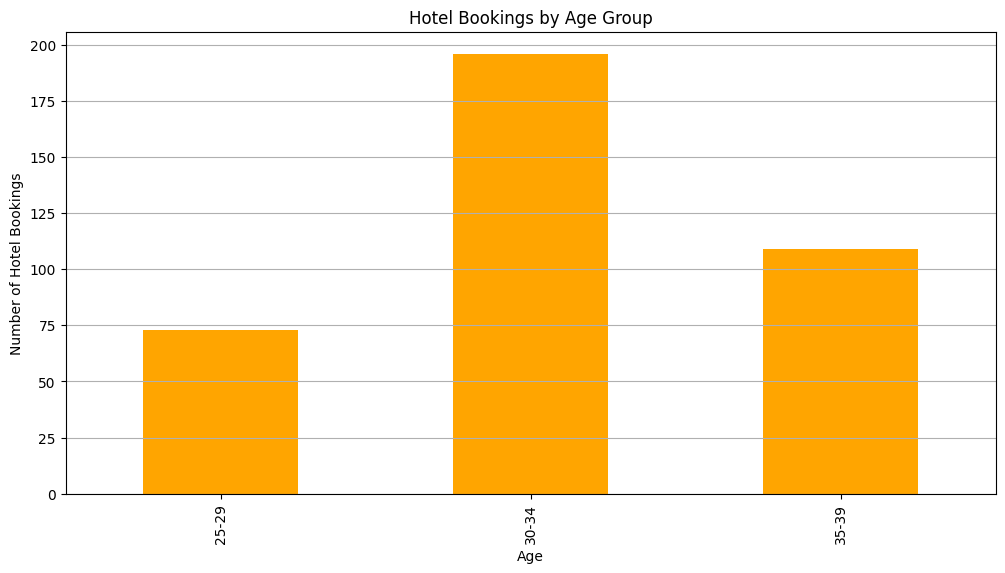

In [63]:
hotel_bookings = df[df['Booked Hotel Or Not'] == 'Yes']

bins = [25, 30, 35, 40]  
labels = ['25-29', '30-34', '35-39']  
hotel_bookings['age_group'] = pd.cut(hotel_bookings['Age'], bins=bins, labels=labels, right=False)

# Calculate the number of hotel bookings in each age group
age_group_bookings = hotel_bookings['age_group'].value_counts().sort_index()

# Print the results
print("Hotel Bookings by Age Group:")
print(age_group_bookings)

# Plotting the results
plt.figure(figsize=(12, 6))
age_group_bookings.plot(kind='bar', color='orange')
plt.title('Hotel Bookings by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Hotel Bookings')
plt.grid(axis='y')

# Show the plot
plt.show()

Hotel Bookings by Frequent Flyer Status:
   Number of Hotel Bookings Frequent Flyer Status
0                       280                    No
1                        72                   Yes
2                        26             No Record


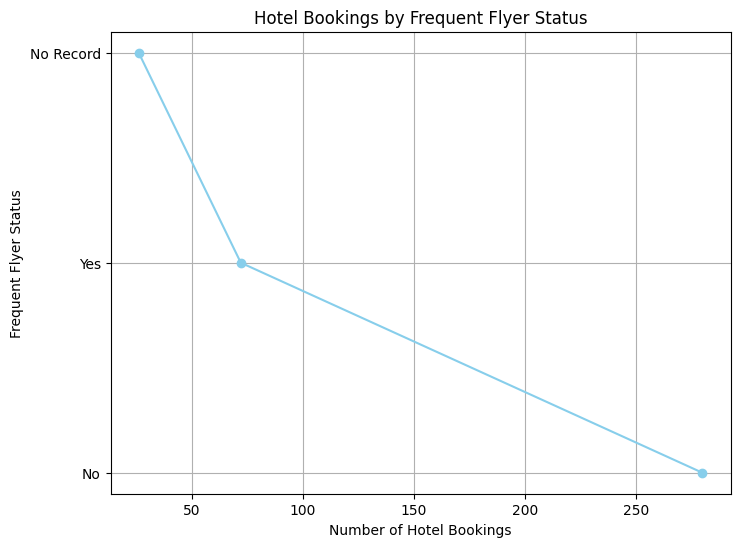

In [73]:
# Filter rows where hotels are booked
hotel_bookings = df[df['Booked Hotel Or Not'] == 'Yes']

# Calculate the count of hotel bookings by frequent flyer status
booking_counts = hotel_bookings['Frequent Flyer'].value_counts()

# Create a DataFrame for visualization
booking_df = pd.DataFrame({
    'Number of Hotel Bookings': booking_counts.values,
    'Frequent Flyer Status': booking_counts.index
})

# Print the results
print("Hotel Bookings by Frequent Flyer Status:")
print(booking_df)

# Plotting the results as a line chart
plt.figure(figsize=(8, 6))
plt.plot(booking_df['Number of Hotel Bookings'], booking_df['Frequent Flyer Status'], marker='o', linestyle='-', color='skyblue')
plt.title('Hotel Bookings by Frequent Flyer Status')
plt.xlabel('Number of Hotel Bookings')
plt.ylabel('Frequent Flyer Status')
plt.grid(True)

# Show the plot
plt.show()



Hotel Bookings by Frequent Flyer Status:
  Frequent Flyer Status  Number of Hotel Bookings
0       Frequent Flyers                        72
1   Non-Frequent Flyers                       280


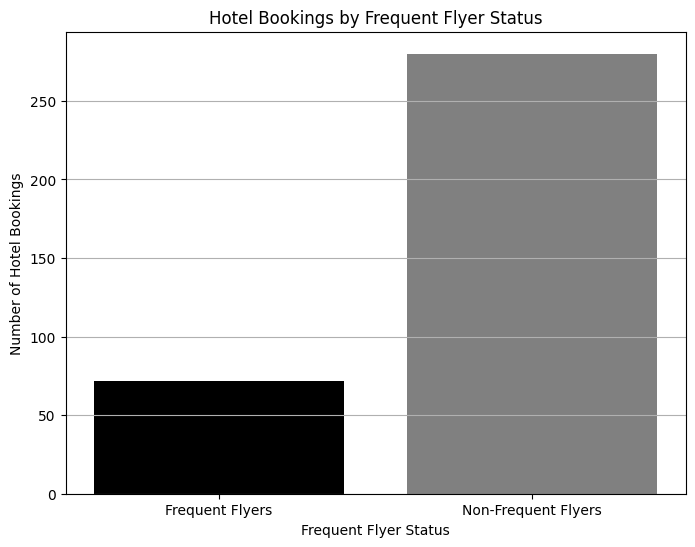

In [77]:
hotel_bookings = df[df['Booked Hotel Or Not'] == 'Yes']

# Calculate the count of hotel bookings by frequent flyer status
frequent_flyer_bookings = hotel_bookings[hotel_bookings['Frequent Flyer'] == 'Yes'].shape[0]
non_frequent_flyer_bookings = hotel_bookings[hotel_bookings['Frequent Flyer'] == 'No'].shape[0]

# Create a DataFrame for visualization
booking_counts = pd.DataFrame({
    'Frequent Flyer Status': ['Frequent Flyers', 'Non-Frequent Flyers'],
    'Number of Hotel Bookings': [frequent_flyer_bookings, non_frequent_flyer_bookings]
})

# Print the results
print("Hotel Bookings by Frequent Flyer Status:")
print(booking_counts)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(booking_counts['Frequent Flyer Status'], booking_counts['Number of Hotel Bookings'], color=['black', 'grey'])
plt.title('Hotel Bookings by Frequent Flyer Status')
plt.xlabel('Frequent Flyer Status')
plt.ylabel('Number of Hotel Bookings')
plt.grid(axis='y')

# Show the plot
plt.show()


Hotel Bookings by Account Sync Status:
  Account Sync Status  Number of Hotel Bookings
0                  No                       258
1                 Yes                       120


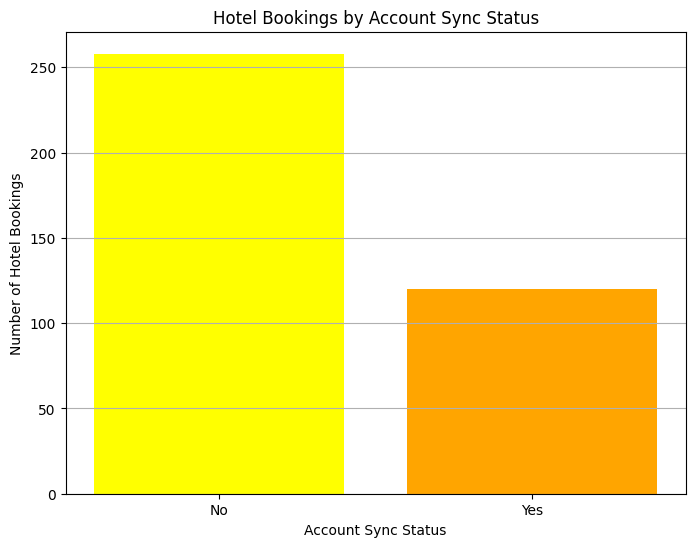

In [79]:
hotel_bookings = df[df['Booked Hotel Or Not'] == 'Yes']

# Calculate the count of hotel bookings by account sync status
sync_status_bookings = hotel_bookings['Account Synced To SocialMedia'].value_counts()

# Create a DataFrame for visualization
sync_status_df = pd.DataFrame({
    'Account Sync Status': sync_status_bookings.index,
    'Number of Hotel Bookings': sync_status_bookings.values
})

# Print the results
print("Hotel Bookings by Account Sync Status:")
print(sync_status_df)

# Plotting the results as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sync_status_df['Account Sync Status'], sync_status_df['Number of Hotel Bookings'], color=['yellow', 'orange'])
plt.title('Hotel Bookings by Account Sync Status')
plt.xlabel('Account Sync Status')
plt.ylabel('Number of Hotel Bookings')
plt.grid(axis='y')

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7184\3538274803.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Annual Income Class', y='Services Opted', palette='viridis', jitter=True)


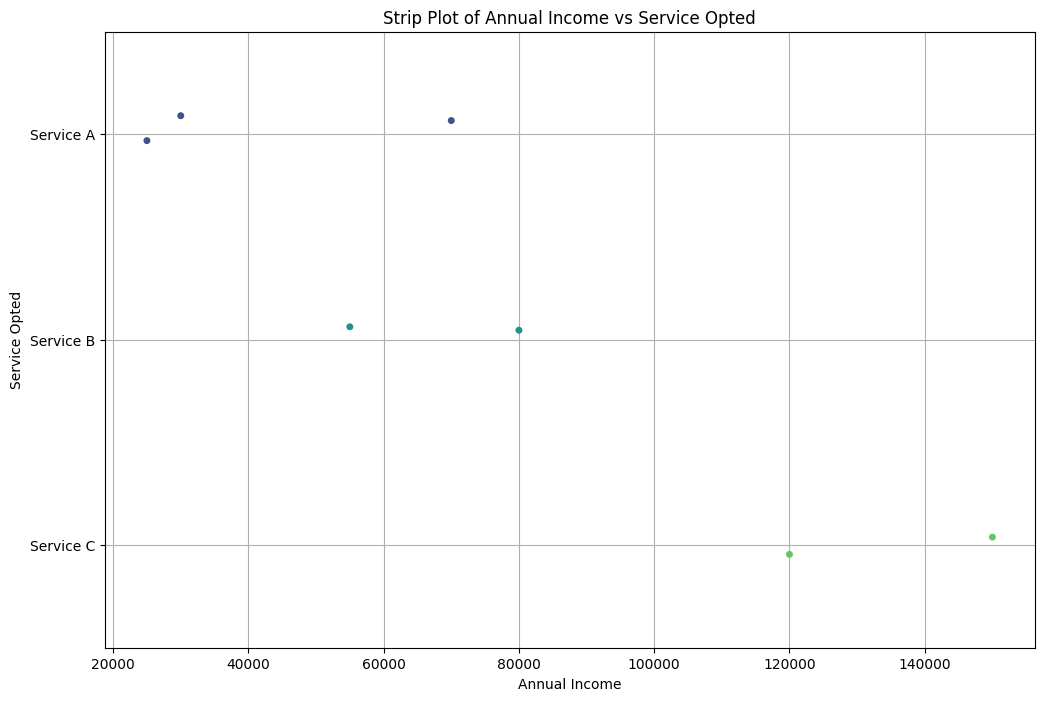

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
df = pd.DataFrame({
    'Annual Income Class': [30000, 55000, 70000, 120000, 25000, 80000, 150000],
    'Services Opted': ['Service A', 'Service B', 'Service A', 'Service C', 'Service A', 'Service B', 'Service C']
})

# Convert to numeric if necessary
df['Annual Income Class'] = pd.to_numeric(df['Annual Income Class'], errors='coerce')

# Plotting the results as a strip plot
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='Annual Income Class', y='Services Opted', palette='viridis', jitter=True)
plt.title('Strip Plot of Annual Income vs Service Opted')
plt.xlabel('Annual Income')
plt.ylabel('Service Opted')
plt.grid(True)

# Show the plot
plt.show()


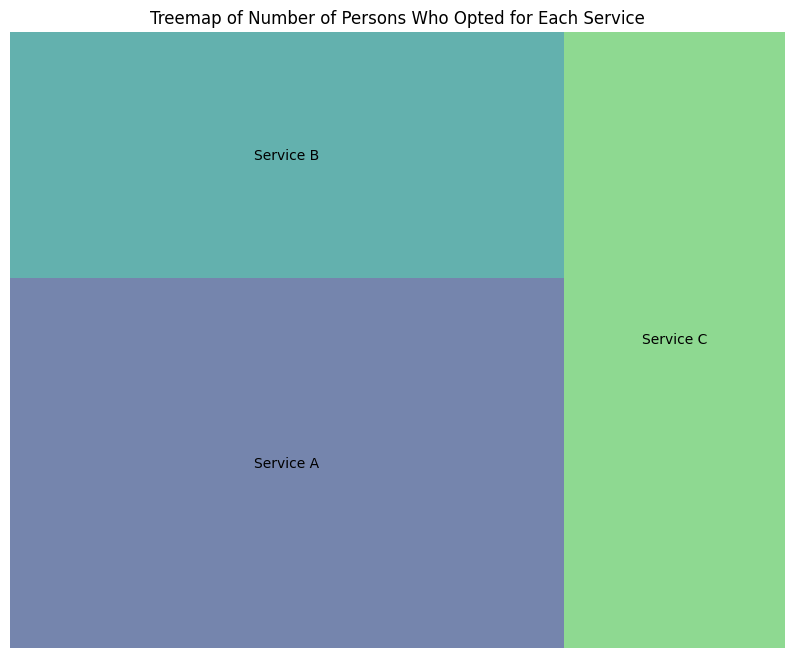

In [113]:


# Count the number of persons who opted for each service
service_counts = df['Services Opted'].value_counts().sort_index()


plt.figure(figsize=(10, 8))
squarify.plot(sizes=service_counts.values, label=service_counts.index, alpha=.7, color = sns.color_palette('viridis', len(service_counts)))
plt.title('Treemap of Number of Persons Who Opted for Each Service')
plt.axis('off')  

# Show the plot
plt.show()
